In [1]:
from learningAgents import ReinforceAlgorithm
from environmentModel import Model

In [2]:
game = Model(totalDemand = 400, 
               tupleCosts = (57, 71),
              totalStages = 25,
            initState = [400/2,0])

In [3]:
game.reset()

(tensor([200.,   0.]), 0, False)

In [4]:
game.adversaryChoosePrice()

135.5

In [5]:
import torch
import torch.nn as nn
from torch.distributions import Categorical

# Hyperparameters
def NeuralNetwork():
    lr = .003
    num_episodes = 20

    nn_ = 100

    policy = nn.Sequential(
                           nn.Linear(2, nn_), 
                           nn.ReLU(),
                           nn.Linear(nn_,nn_),
                           nn.ReLU(),
                           nn.Linear(nn_,100),                       
                           nn.Softmax(dim=0))
    optim = torch.optim.Adam(policy.parameters(), lr=lr)

    return policy, optim


In [6]:
algorithm = ReinforceAlgorithm(game, NeuralNetwork, 100, 10, discountFactor =.5)

In [7]:
algorithm.solver()

In [8]:
import pandas as pd
profits = pd.DataFrame(game.profit).T
prices = pd.DataFrame(game.prices).T
demandPotential = pd.DataFrame(game.demandPotential).T

In [9]:
demandPotential

,0,1
0,200.000000,200.000000
1,210.000000,190.000000
2,215.000000,185.000000
3,217.500000,182.500000
4,218.750000,181.250000
5,219.375000,180.625000
6,219.687500,180.312500
7,219.843750,180.156250
8,219.921875,180.078125
9,219.960938,180.039062


<AxesSubplot:>

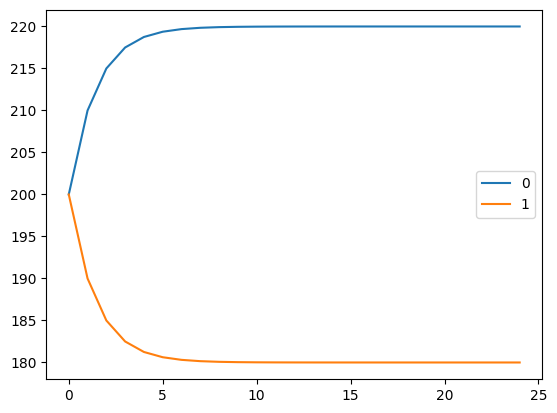

In [10]:
demandPotential.plot()

In [11]:
profits

,0,1
0,4943.250000,4160.250000
1,5683.250000,3540.250000
2,6072.000000,3249.000000
3,6271.062500,3108.062500
4,6371.765625,3038.765625
5,6422.410156,3004.410156
6,6447.805664,2987.305664
7,6460.521729,2978.771729
8,6466.884338,2974.509338
9,6470.066788,2972.379288


<AxesSubplot:>

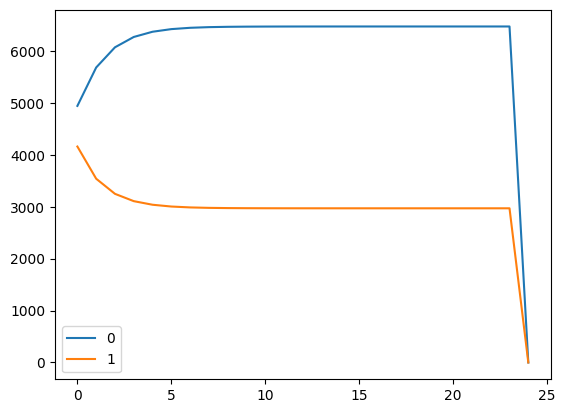

In [12]:
profits.plot()

In [13]:
prices

,0,1
0,115.500000,135.500000
1,120.500000,130.500000
2,123.000000,128.000000
3,124.250000,126.750000
4,124.875000,126.125000
5,125.187500,125.812500
6,125.343750,125.656250
7,125.421875,125.578125
8,125.460938,125.539062
9,125.480469,125.519531


<AxesSubplot:>

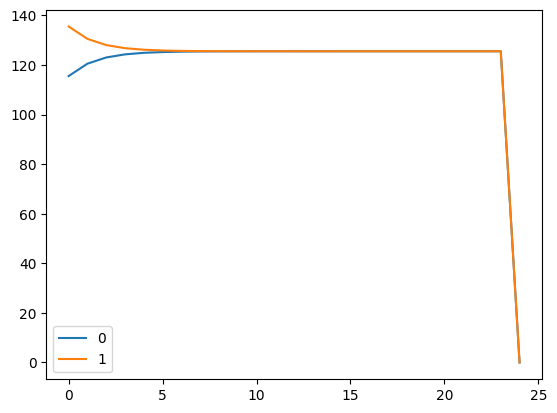

In [14]:
prices.plot()

In [19]:
learning_average = pd.DataFrame(algorithm.returns.mean(axis = 0))
learning_std = pd.DataFrame(algorithm.returns.std(axis = 0))

In [16]:
algorithm.returns.shape

(100, 10)

<AxesSubplot:>

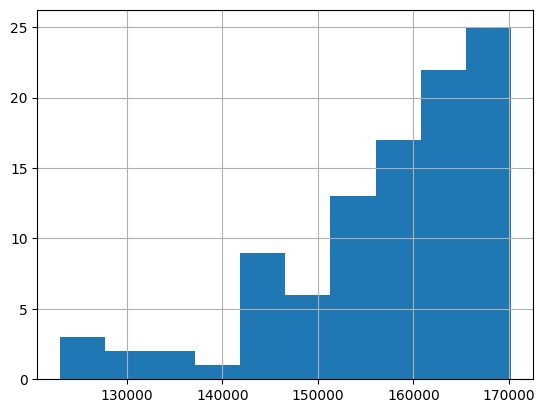

In [17]:
pd.DataFrame(algorithm.returns)[9].hist()

<AxesSubplot:>

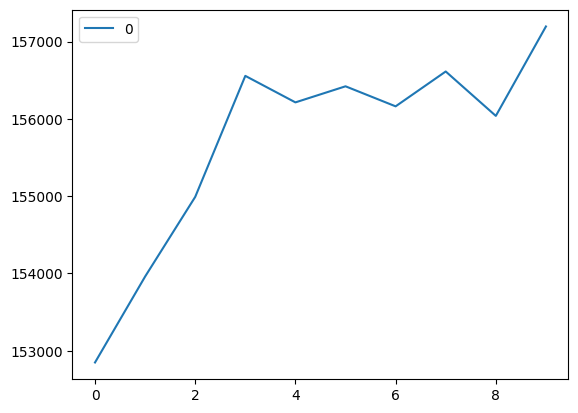

In [18]:
learning.plot()

<AxesSubplot:>

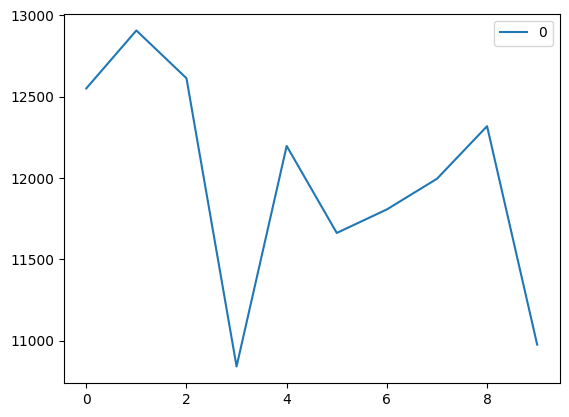

In [20]:
learning_std.plot()